## Basics

In [ ]:
# Python ≥3.5 is required
import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

import pandas as pd # Pandas module to enable data manipulation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix


# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

##Get the data

In [ ]:
import os

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Terry0923/ML_Project/master/"
BETTING_PATH = os.path.join("datasets", "betting")

In [ ]:
def load_betting_data(betting_path=BETTING_PATH):
  csv_path = os.path.join(DOWNLOAD_ROOT, "nba.games.stats.csv")
  return pd.read_csv(csv_path)

In [ ]:
betting = load_betting_data()

betting.head(100)

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,141,BOS,14,2014-11-30,Home,SAS,L,89,111,36,87,0.414,6,18,0.333,11,15,0.733,12,42,21,5,5,15,21,41,85,0.482,11,26,0.423,18,20,0.900,10,45,25,9,5,14,11
96,151,BOS,15,2014-12-02,Away,ATL,L,105,109,41,84,0.488,12,23,0.522,11,13,0.846,9,42,33,10,3,21,20,43,82,0.524,11,24,0.458,12,14,0.857,4,31,36,8,8,16,14
97,161,BOS,16,2014-12-03,Home,DET,W,109,102,37,93,0.398,13,30,0.433,22,27,0.815,8,49,28,8,6,12,21,37,102,0.363,8,27,0.296,20,29,0.690,16,55,20,7,7,11,23
98,171,BOS,17,2014-12-05,Home,LAL,W,113,96,46,90,0.511,8,20,0.400,13,22,0.591,10,54,29,6,2,16,19,38,92,0.413,6,16,0.375,14,19,0.737,7,38,14,2,4,12,18


##Data Visualization

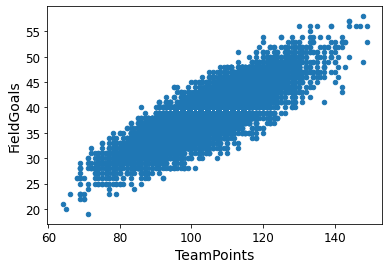

In [ ]:
betting.plot(kind="scatter", x="TeamPoints", y="FieldGoals")

In [ ]:
betting['difference'] = betting['TeamPoints'] - betting['OpponentPoints']
betting = betting.drop(["Unnamed: 0"], axis=1)
corr_matrix = betting.corr()
corr_matrix['difference'].sort_values(ascending=True)





OpponentPoints             -0.565453
Opp.FieldGoals.            -0.541059
Opp.FieldGoals             -0.500799
Opp.Assists                -0.405074
Opp.3PointShots.           -0.391714
Opp.3PointShots            -0.335686
Opp.TotalRebounds          -0.327804
Opp.Blocks                 -0.186140
Opp.Steals                 -0.171225
Turnovers                  -0.136322
Opp.FreeThrows.            -0.129428
Opp.FreeThrows             -0.107605
Opp.3PointShotsAttempted   -0.094593
Opp.FreeThrowsAttempted    -0.066615
TotalFouls                 -0.058621
OffRebounds                -0.025591
Opp.FieldGoalsAttempted    -0.005668
Game                       -0.001641
FieldGoalsAttempted         0.005668
Opp.OffRebounds             0.025591
Opp.TotalFouls              0.058621
FreeThrowsAttempted         0.066615
X3PointShotsAttempted       0.094593
FreeThrows                  0.107605
FreeThrows.                 0.129428
Opp.Turnovers               0.136322
Steals                      0.171225
B

In [ ]:

corr_matrix.style.background_gradient(cmap='seismic')

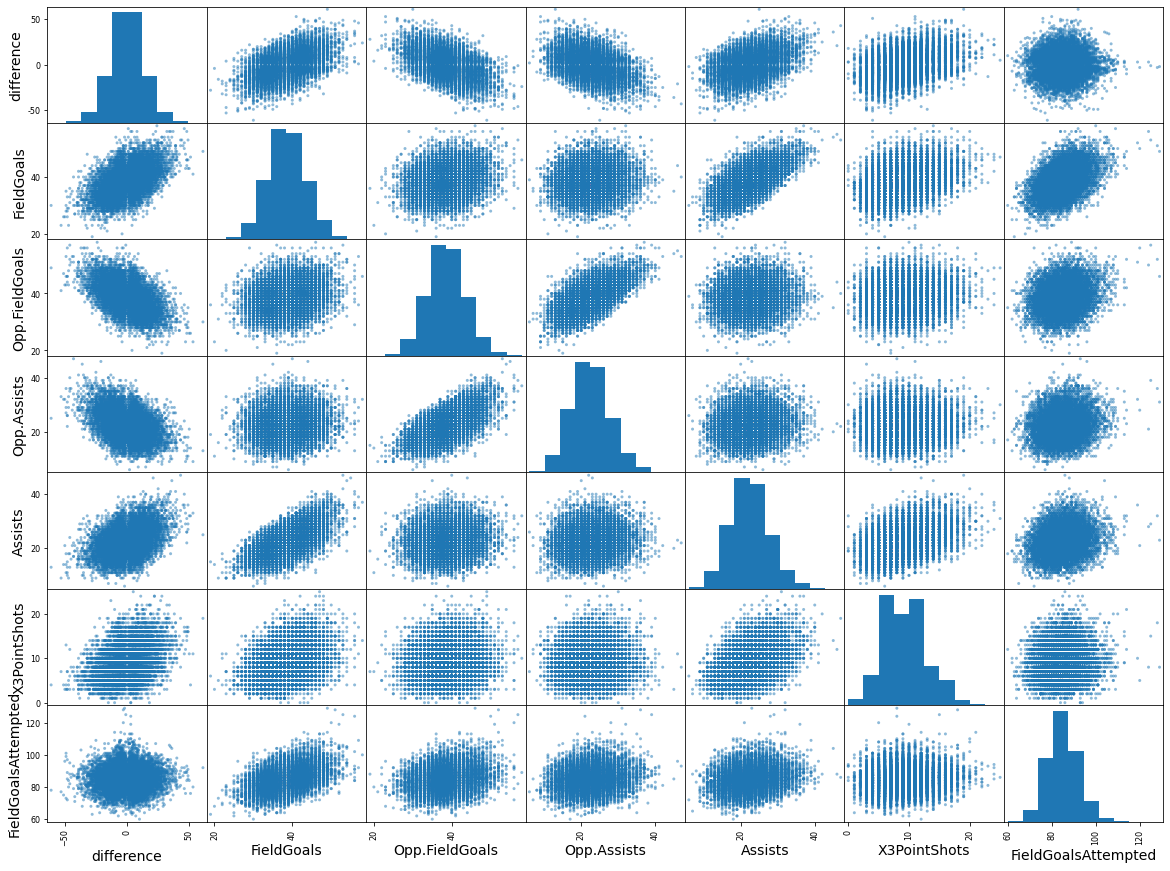

In [ ]:
attributes = ["difference","FieldGoals", "Opp.FieldGoals","Opp.Assists", "Assists","X3PointShots","FieldGoalsAttempted"]
fig = scatter_matrix(betting[attributes], figsize=(20, 15))

## Data Cleaning

In [ ]:
betting.head(10)

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,difference
0,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22,-7
1,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26,10
2,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15,-2
3,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30,-3
4,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29,7
5,ATL,6,2014-11-10,Away,NYK,W,91,85,27,71,0.380,10,27,0.370,27,28,0.964,9,38,20,7,3,15,16,36,83,0.434,6,26,0.231,7,12,0.583,11,40,23,4,2,15,26,6
6,ATL,7,2014-11-12,Home,UTA,W,100,97,39,76,0.513,9,20,0.450,13,18,0.722,13,46,23,8,4,18,12,43,86,0.500,5,23,0.217,6,12,0.500,8,30,28,12,8,11,17,3
7,ATL,8,2014-11-14,Home,MIA,W,114,103,42,75,0.560,11,28,0.393,19,23,0.826,3,36,33,10,5,13,20,35,74,0.473,10,21,0.476,23,25,0.920,5,32,27,10,3,14,20,11
8,ATL,9,2014-11-15,Away,CLE,L,94,127,40,90,0.444,3,22,0.136,11,13,0.846,11,37,26,6,8,18,12,49,90,0.544,19,31,0.613,10,13,0.769,12,47,39,12,2,13,14,-33
9,ATL,10,2014-11-18,Home,LAL,L,109,114,41,85,0.482,9,27,0.333,18,23,0.783,13,38,22,7,3,10,17,47,87,0.540,6,17,0.353,14,22,0.636,13,44,24,7,0,11,24,-5


In [ ]:
y = betting['TeamPoints'] - betting['OpponentPoints']

In [ ]:
y.head(10)

0    -7
1    10
2    -2
3    -3
4     7
5     6
6     3
7    11
8   -33
9    -5
dtype: int64

In [ ]:
betting.columns

Index(['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints',
       'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.',
       'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows',
       'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls',
       'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.',
       'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.',
       'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.',
       'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals',
       'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls', 'difference'],
      dtype='object')

In [ ]:

#Dropping result metrics

betting = betting.drop("TeamPoints", axis=1)
betting = betting.drop("OpponentPoints", axis=1)
betting = betting.drop("WINorLOSS", axis=1)
betting = betting.drop("difference",axis=1)




betting_num = betting.copy()
betting_num = betting_num.drop("Team", axis=1)
betting_num = betting_num.drop("Home", axis=1)
betting_num = betting_num.drop("Opponent", axis=1)
betting_num = betting_num.drop("Date", axis=1)

betting_num.head(10)


,Game,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,2,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,3,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,4,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,5,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29
5,6,27,71,0.380,10,27,0.370,27,28,0.964,9,38,20,7,3,15,16,36,83,0.434,6,26,0.231,7,12,0.583,11,40,23,4,2,15,26
6,7,39,76,0.513,9,20,0.450,13,18,0.722,13,46,23,8,4,18,12,43,86,0.500,5,23,0.217,6,12,0.500,8,30,28,12,8,11,17
7,8,42,75,0.560,11,28,0.393,19,23,0.826,3,36,33,10,5,13,20,35,74,0.473,10,21,0.476,23,25,0.920,5,32,27,10,3,14,20
8,9,40,90,0.444,3,22,0.136,11,13,0.846,11,37,26,6,8,18,12,49,90,0.544,19,31,0.613,10,13,0.769,12,47,39,12,2,13,14
9,10,41,85,0.482,9,27,0.333,18,23,0.783,13,38,22,7,3,10,17,47,87,0.540,6,17,0.353,14,22,0.636,13,44,24,7,0,11,24


In [ ]:
betting.head(100)

,Team,Game,Date,Home,Opponent,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,1,2014-10-29,Away,TOR,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,ATL,2,2014-11-01,Home,IND,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,ATL,3,2014-11-05,Away,SAS,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,ATL,4,2014-11-07,Away,CHO,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,ATL,5,2014-11-08,Home,NYK,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BOS,14,2014-11-30,Home,SAS,36,87,0.414,6,18,0.333,11,15,0.733,12,42,21,5,5,15,21,41,85,0.482,11,26,0.423,18,20,0.900,10,45,25,9,5,14,11
96,BOS,15,2014-12-02,Away,ATL,41,84,0.488,12,23,0.522,11,13,0.846,9,42,33,10,3,21,20,43,82,0.524,11,24,0.458,12,14,0.857,4,31,36,8,8,16,14
97,BOS,16,2014-12-03,Home,DET,37,93,0.398,13,30,0.433,22,27,0.815,8,49,28,8,6,12,21,37,102,0.363,8,27,0.296,20,29,0.690,16,55,20,7,7,11,23
98,BOS,17,2014-12-05,Home,LAL,46,90,0.511,8,20,0.400,13,22,0.591,10,54,29,6,2,16,19,38,92,0.413,6,16,0.375,14,19,0.737,7,38,14,2,4,12,18


## Pipeline

In [ ]:
pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [ ]:


num_attribs = list(betting_num.columns)
print(num_attribs)
cat_attribs = ["Team","Home","Opponent"]

full_pipeline = ColumnTransformer([
        ("num", pipeline, num_attribs),
        ("one", OneHotEncoder(), cat_attribs)
    ])

['Game', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls']


In [ ]:
betting_prepared = full_pipeline.fit_transform(betting)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(betting_prepared, y, test_size=0.1, random_state=42)

## Run Models

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict against test set
results =  lin_reg.predict(X_test)

In [ ]:
# Show what we got
print("Predictions:", results)

Predictions: [-12.  -4. -16. -23.  -1.  -7.   5.  -9. -12.   5.   2.  -3.   9.   8.
   8.  10.   2.  -8. -16.   7.  -5.  -6. -14.  13.  -3.  -6.  53.  -6.
 -12.  -1. -30.  -8. -12.  27. -25.  -1. -26.  10.   3.   7.   7.  27.
   5.  14.  -8.  21.   5.  -7.   7.  -3.   2.  23.  -7.   6.  11.   9.
   2. -29.  -2.   7.  -3. -11.   6.   8.  13.   5.  -5.  -5. -10.  11.
  -7.  17.  -9.   9.  24.  -6.  -3.  18.   5.  -7.  14. -14.  -2.  13.
  19.  -3. -10.  -9.  11.  22.  11. -12.  11.   7.  -6.   8.  33. -11.
   6.  -6. -17.   9.  -4.  -6. -26.   3. -18.  47.  -3.  -4.   5.  -4.
  -8.  10.  -4.   8. -12.  18. -12.  -3. -15.  -6.  -5.  -7. -13.  -8.
   1.   6.  13.  -9.  -2.   4.   5.  -6.  10.   3.   1.  -6.   5.  20.
   1.  -8.  -5.  11.  -6.  -7. -24.  10.  -7.  -8.  -5.   3.   5.  -1.
   3. -16.  20. -21.   8.   5.   6.   7. -15.  -8.   9.  -2.  -8.  -8.
  10.  -5. -22. -10.  -8. -24. -14.   2. -13. -11.   6.  24.   5.   7.
  -9.  -6.  -2.   8.  -8.  -6.   9.  -5.   9.   8. -39.  -7.  19

In [ ]:
# Display RMSE
lin_mse = mean_squared_error(y_test, results)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.853936846927961e-14

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
f_results = forest_reg.predict(X_test)

In [ ]:
# Display RMSE
f_mse = mean_squared_error(y_test, f_results)
f_rmse = np.sqrt(f_mse)
f_rmse

4.9666144449428975

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=10)

In [ ]:
svr.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_res = svr.predict(X_test)

In [ ]:
# Display RMSE
svr_mse = mean_squared_error(y_test, svr_res)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

1.3242432893363327

In [ ]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(49)
tf.random.set_seed(49)

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

In [ ]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])





In [ ]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
277/277 [==============================] - 1s 5ms/step - loss: 2.1090 - accuracy: 0.0104
Epoch 2/15
277/277 [==============================] - 1s 5ms/step - loss: 1.0525 - accuracy: 0.0131
Epoch 3/15
277/277 [==============================] - 1s 5ms/step - loss: 0.9076 - accuracy: 0.0146
Epoch 4/15
277/277 [==============================] - 1s 5ms/step - loss: 0.8345 - accuracy: 0.0154
Epoch 5/15
277/277 [==============================] - 1s 5ms/step - loss: 0.7677 - accuracy: 0.0165
Epoch 6/15
277/277 [==============================] - 1s 5ms/step - loss: 0.7285 - accuracy: 0.0159
Epoch 7/15
277/277 [==============================] - 1s 5ms/step - loss: 0.6761 - accuracy: 0.0152
Epoch 8/15
277/277 [==============================] - 1s 5ms/step - loss: 0.6486 - accuracy: 0.0166
Epoch 9/15
277/277 [==============================] - 2s 6ms/step - loss: 0.6258 - accuracy: 0.0166
Epoch 10/15
277/277 [==============================] - 1s 5ms/step - loss: 0.5894 - accuracy: 0.0168

In [ ]:
model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.0274


[0.48786360025405884, 0.027439024299383163]